In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import matplotlib.pyplot as plt
from PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs import make_gmm_program_univariate, make_gmm_program_univariate_batched

In [46]:
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC import Hamiltionian_MC

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison, make_reduced_list_comparison

In [50]:
pprogram = make_gmm_program_univariate(
    dirichlet_beta = 1.0,
    lambda1= 10.0
    )

In [51]:
r = pprogram(
)

In [52]:
r

{'phi': tensor([0.1429, 0.5790, 0.2781]),
 'mu': tensor([-0.7915, -4.5434, -3.5513]),
 'sigma_squared': tensor([0.3169, 0.3675, 0.3489]),
 'z': tensor([2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2,
         1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2,
         1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1,
         1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1,
         1, 2, 2, 1]),
 'x': tensor([-3.5475, -4.6175, -4.5165, -4.2508, -4.6378, -0.4957, -3.4929, -3.5348,
         -4.7707, -4.2884, -4.2216, -1.0013, -4.5201, -0.7365, -3.3939, -3.1109,
         -3.4529, -3.6806, -4.7519, -4.4531, -5.1133, -0.5344, -4.5229, -3.5018,
         -4.3140, -3.7246, -4.8871, -4.3230, -3.5452, -3.9446, -4.3120, -3.6563,
         -0.8033, -3.5576, -3.2997, -4.4148, -3.1185, -4.9329, -3.4798, -4.6000,
         -4.7057, -4.9787, -3.7751, -3.3175, -4.2236, -5.0520, -4.7933, -3.3303,
         -4.6439, -

(array([ 5.,  7.,  8., 12.,  6.,  6.,  5.,  6.,  4., 11.,  9.,  2.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  2.,  4.,
         1.,  2.,  2.,  1.]),
 array([-5.11942291, -4.95305872, -4.786695  , -4.62033081, -4.45396709,
        -4.2876029 , -4.12123919, -3.95487499, -3.78851104, -3.62214708,
        -3.45578313, -3.28941917, -3.12305522, -2.95669127, -2.79032731,
        -2.62396336, -2.4575994 , -2.29123545, -2.12487125, -1.95850742,
        -1.79214346, -1.62577939, -1.45941544, -1.29305148, -1.12668753,
        -0.96032357, -0.79395956, -0.6275956 , -0.46123162, -0.29486766,
        -0.12850368]),
 <BarContainer object of 30 artists>)

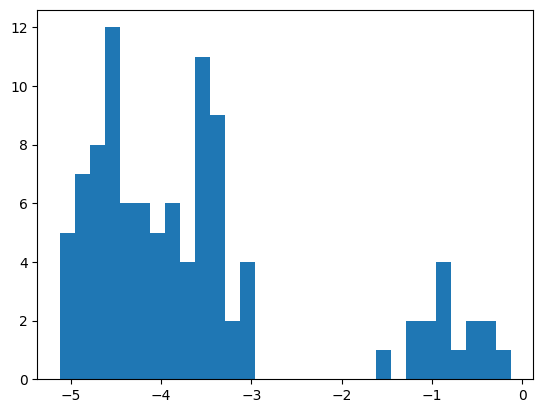

In [53]:
x = r['x']

plt.hist(x, bins = 30)

In [54]:
pprogram_return_only_x = return_only_x(pprogram)

In [84]:
models = make_default_list_comparison(pprogram= pprogram_return_only_x, n_samples= 1000)

model_list = {
        #"hmc_sampler": models[0],
        "vi_diag": models[1],
        "vi_multivariate_normal": models[2],
        "vi_laplace": models[3],
        "vi_autoIAF": models[4],
        "vi_autostrucured": models[5],
}

Warmup:   1%|          | 8/1500 [00:18, 11.41it/s, step size=9.43e-03, acc. prob=0.661]

In [85]:
samples_per_model = {}

for name, model in model_list.items():
    samples_per_model[name] = model.sample_posterior(x = x)

....................
....................
....................
....................
....................


In [86]:
r["mu"], r["sigma_squared"]

(tensor([-0.7915, -4.5434, -3.5513]), tensor([0.3169, 0.3675, 0.3489]))

tensor([-4.1172, -3.1796, -0.8487]) tensor(1.3855)
tensor([0.5915, 1.2121, 0.6115]) tensor(0.3098)


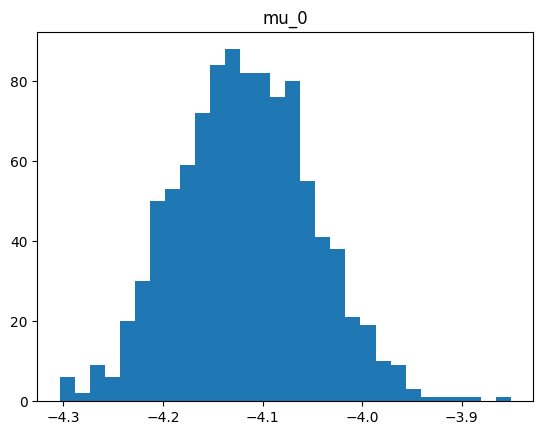

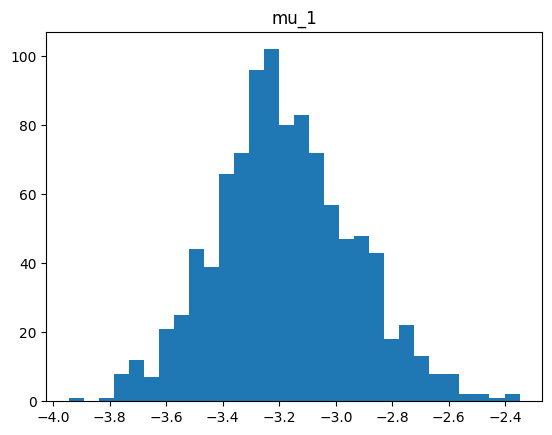

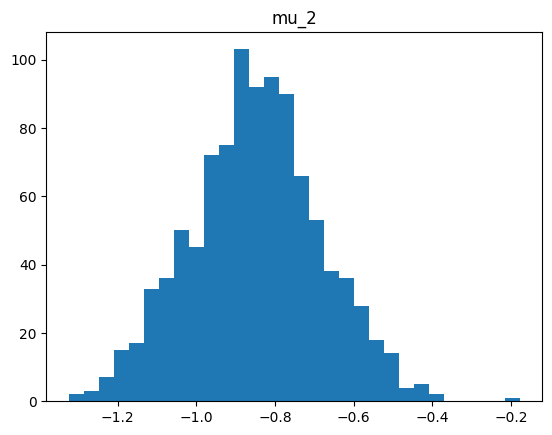

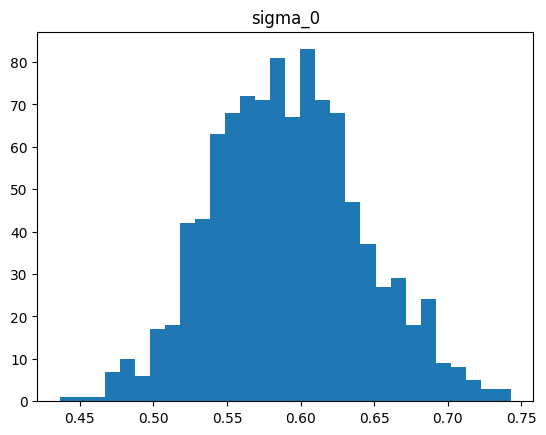

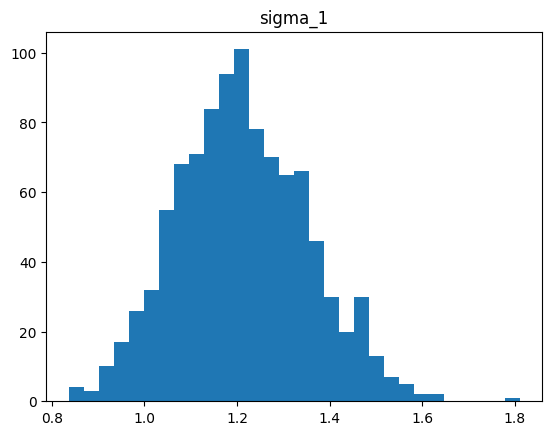

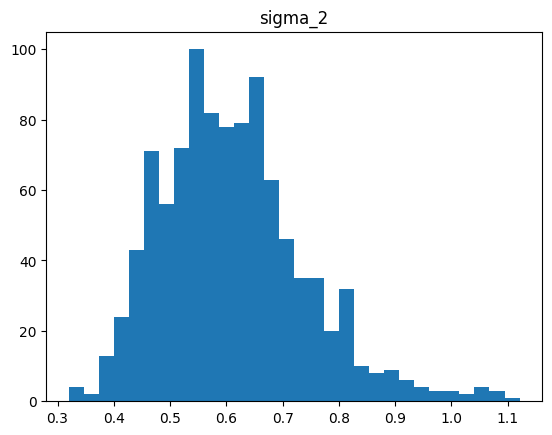

In [88]:
c_model = "vi_multivariate_normal"
samples_mu = samples_per_model[c_model]["mu"]
samples_sigma = samples_per_model[c_model]["sigma_squared"]

print(samples_mu.mean(dim = 0), samples_mu.std())
print(samples_sigma.mean(dim = 0), samples_sigma.std())


for dim in range(3):
    plt.figure()
    plt.hist(samples_per_model[c_model]["mu"][:,dim], bins = 30)
    plt.title(f"mu_{dim}")

for dim in range(3):
    plt.figure()
    plt.hist(samples_per_model[c_model]["sigma_squared"][:,dim], bins = 30)
    plt.title(f"sigma_{dim}")

In [89]:
samples_per_model["vi_multivariate_normal"]["sigma_squared"].median()

tensor(0.6470)

In [90]:
model = Hamiltionian_MC(
    pprogram=pprogram_return_only_x,
    n_samples=500,
    n_warmup=500
)

In [ ]:
samples = model.sample_posterior(x = x)

Sample: 100%|██████████| 1000/1000 [01:17, 12.86it/s, step size=6.35e-01, acc. prob=0.913]


In [ ]:
r["mu"]

tensor([ -3.7376, -10.2377,   1.3009])

In [ ]:
samples.keys()

dict_keys(['mu', 'phi', 'sigma_squared'])

In [ ]:
samples["mu"].median(dim = 0)

torch.return_types.median(
values=tensor([ -3.7375, -10.0621,   1.3357]),
indices=tensor([190,  74, 185]))

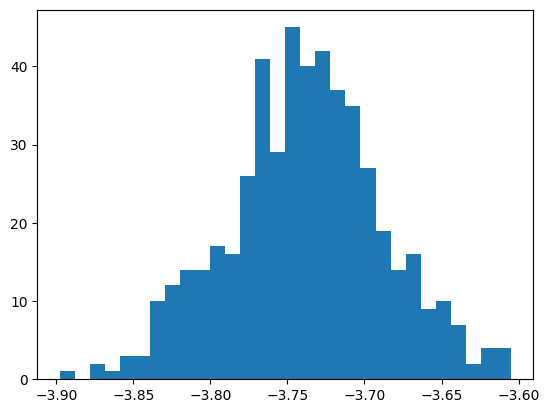

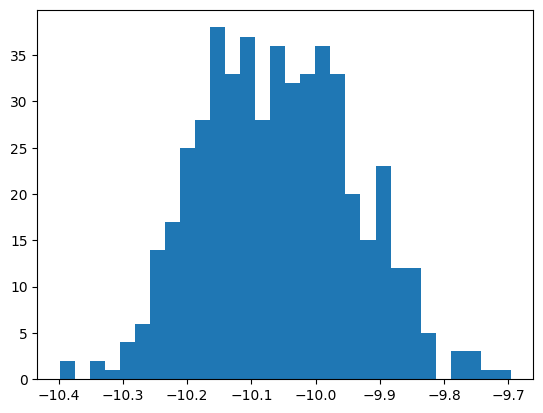

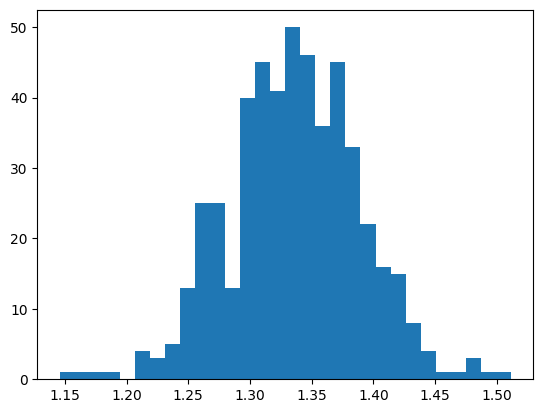

In [ ]:
for dim in range(3):
    plt.hist(samples["mu"][:,dim].numpy(), bins = 30)
    plt.show()

In [ ]:
r["sigma_squared"]

tensor([0.2416, 0.6708, 0.2905])

In [ ]:
samples["sigma_squared"].median(dim = 0)

NameError: name 'samples' is not defined

In [ ]:
pprogram_batched = make_gmm_program_univariate_batched(
    n = 100,
    p = 3,
    batch_size = 1000,
    a1 = 5.0,
    b1 = 2.0,
    dirichlet_beta = 1.0,
    lambda1 = 3.0,
    )

In [ ]:
samples_batched = pprogram_batched()

In [ ]:
samples_batched["sigma_squared"].shape

torch.Size([1000, 3])

In [ ]:
for key in samples_batched.keys():
    print(key, samples_batched[key].shape)

phi torch.Size([3, 1000])
mu torch.Size([1000, 3])
sigma_squared torch.Size([1000, 3])
z torch.Size([1000, 100])
x torch.Size([1000, 100])
beta torch.Size([1000, 6])
